In [1]:
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

from jcopml.feature_importance import mean_score_decrease
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.plot import plot_missing_value
from jcopml.utils import save_model, load_model


In [2]:
df = pd.read_csv("data/small_mnist.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.iloc[1:].values.max()

255

## Data set splitting dan scaler pada data image

In [4]:
X = df.drop(columns=["label"]).values / 255 # biar 0 sampai 1
y = df.label.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 784), (400, 784), (1600,), (400,))

## Visualize random data

In [5]:
import matplotlib.pyplot as plt

In [6]:
X_train.shape

(1600, 784)

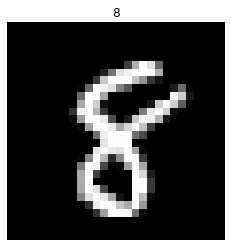

In [13]:
N = len(X_train)
idx = np.random.choice(N)
img, label = X_train[idx], y_train[idx]

plt.imshow(img.reshape(28, 28), cmap="gray")
plt.title(label)
plt.axis("off");

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from jcopml.tuning import random_search_params as rsp

In [9]:
pipeline = Pipeline([
    ("algo", RandomForestClassifier(n_jobs=-1, random_state=42))
])

model = RandomizedSearchCV(pipeline, rsp.rf_params, n_jobs=-1, n_iter=50, cv=3, verbose=1, random_state=42)
model.fit(X_train, y_train)

print("data train : ", model.score(X_train, y_train))
print("data test  : ", model.score(X_test, y_test))

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 14.6min finished


data train :  0.999375
data test  :  0.9275


# Visualize prediction


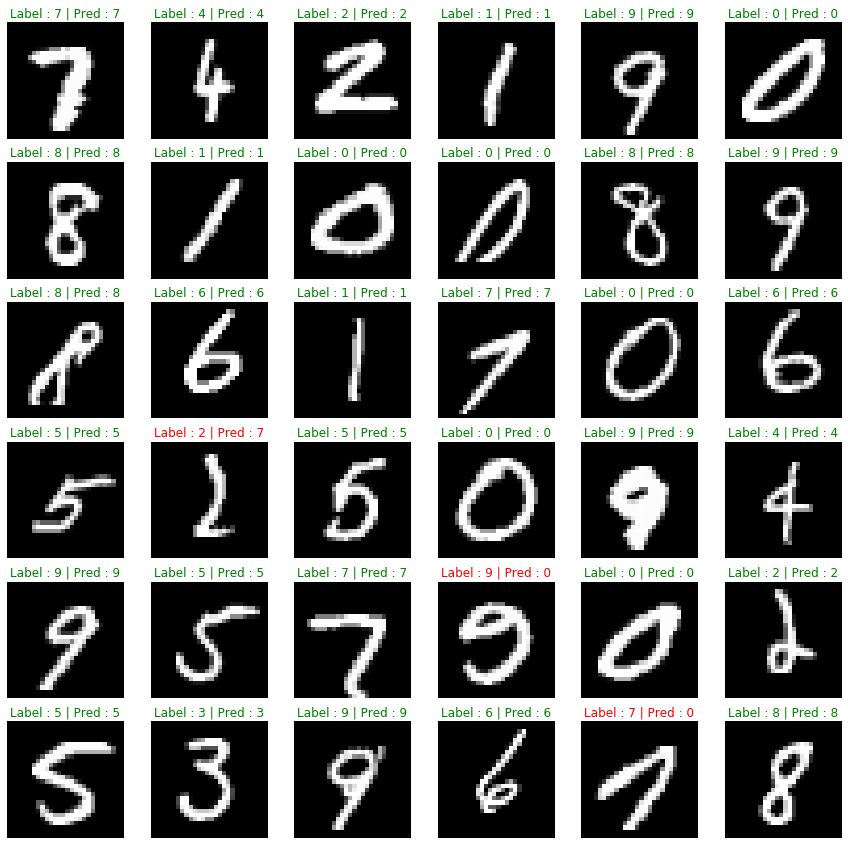

In [10]:
idx = np.random.choice(len(X_test), size=36, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)


fig, axes = plt.subplots(6, 6, figsize=(15, 15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {"color":"g"} if label == pred else {"color":"r"}
    
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label : {label} | Pred : {pred}", fontdict=font)
    ax.axis("off")

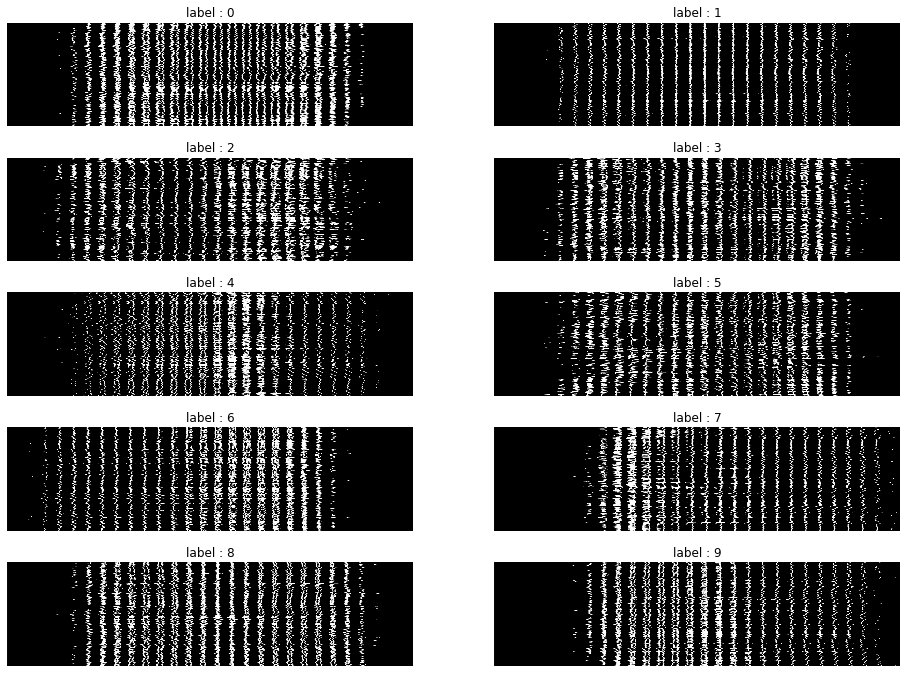

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(16, 12))

for idx, ax in enumerate(axes.flatten()):
    ax.imshow(df.iloc[idx*200:(idx+1) * 200], cmap="gray")
    ax.set_title(f"label : {idx}")
    ax.axis("off")

In [14]:
from sklearn.svm import SVC

In [17]:
pipeline = Pipeline([
    ("algo", SVC())
])

model = RandomizedSearchCV(pipeline, rsp.svm_params, n_jobs=-1, cv=3, verbose=1, random_state=42)
model.fit(X_train, y_train)

print("data train : ", model.score(X_train, y_train))
print("data test  : ", model.score(X_test, y_test))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


data train :  1.0
data test  :  0.955


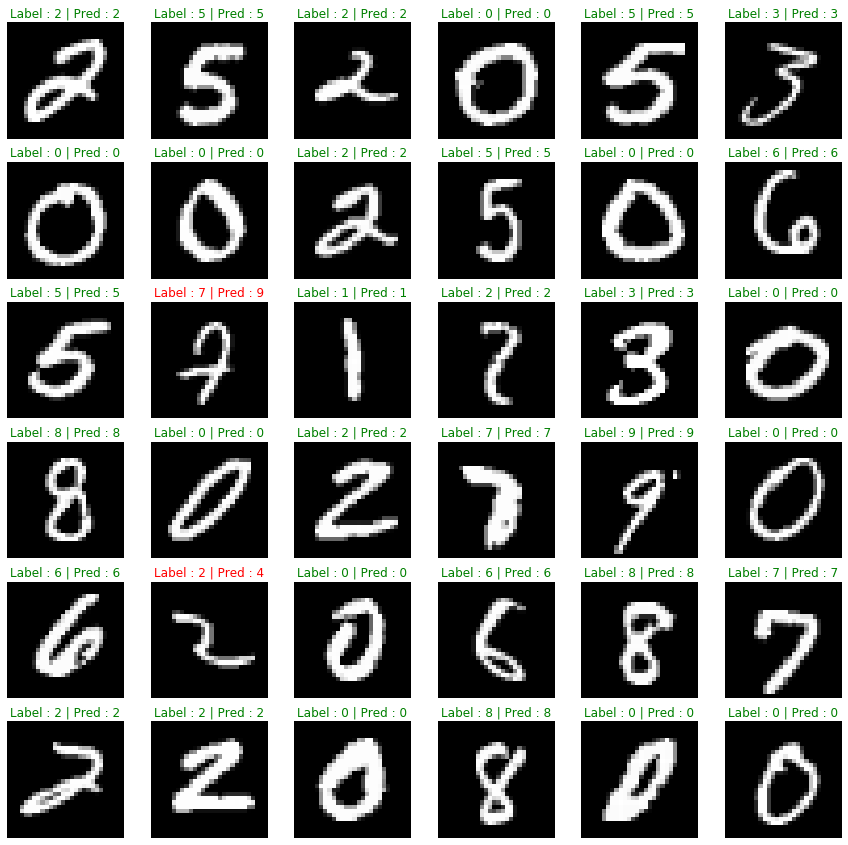

In [18]:
idx = np.random.choice(len(X_test), size=36, replace=False)
images, labels = X_test[idx], y_test[idx]
preds = model.predict(images)


fig, axes = plt.subplots(6, 6, figsize=(15, 15))
for img, label, pred, ax in zip(images, labels, preds, axes.flatten()):
    font = {"color":"g"} if label == pred else {"color":"r"}
    
    ax.imshow(img.reshape(28, 28), cmap="gray")
    ax.set_title(f"Label : {label} | Pred : {pred}", fontdict=font)
    ax.axis("off")